In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


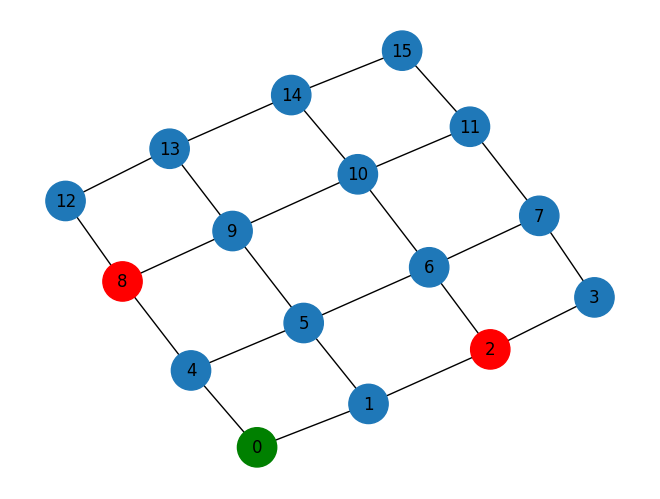

Final Slice 1 Paths: [[8, 4, 0]]
Final Slice 2 Paths: [[2, 6, 5, 4, 0]]


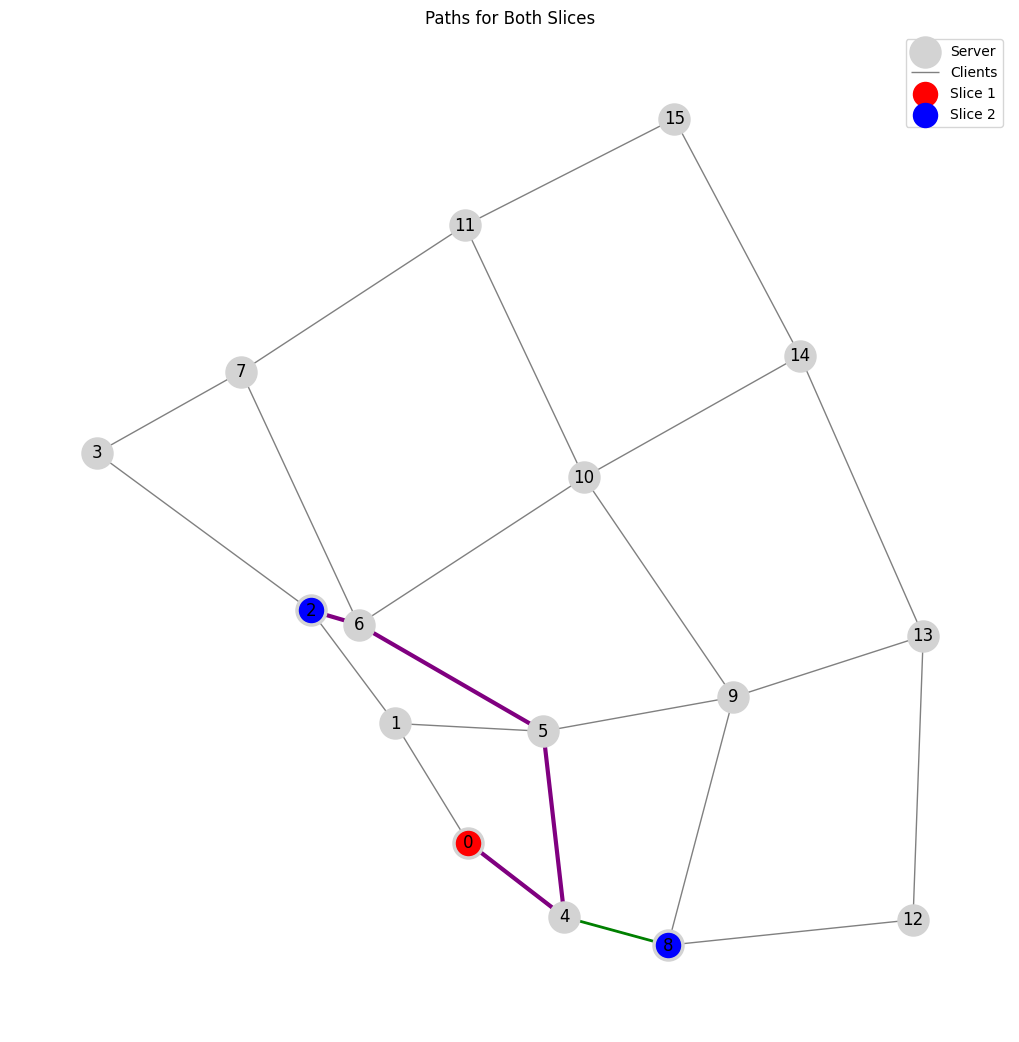

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
clients = [8, 2]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



In [3]:
slice_1_paths = rede.final_slice_1_paths  
slice_2_paths = rede.final_slice_2_paths  

controlador.initialize_slices(network=rede, clients=[14,2], server=0, protocols=["BFK_BQC", "AC_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

for _ in range(10):
    protocol = random.choice(["BFK_BQC", "AC_BQC"])  
    if protocol == "BFK_BQC":
        alice_id = 8
        slice_path = rede.final_slice_1_paths[0]  
    elif protocol == "AC_BQC":
        alice_id = 2
        slice_path = rede.final_slice_2_paths[0]  
    bob_id = 0
    num_qubits = random.randint(3, 10)
    num_gates = random.randint(10, 20)

    # Passa o slice_path para garantir a rota correta na requisição
    rede.generate_request_slice(alice_id, bob_id, num_qubits, num_gates, protocol=protocol, slice_path=slice_path)

scheduled_timeslots = rede.send_requests_to_controller(controlador)
slice_paths = controlador.slices  
rede.execute_scheduled_requests(scheduled_timeslots)


2024-12-13 12:35:18,833: Slice slice_1 configurado para protocolo BFK_BQC com rotas: {'client': [8, 4, 0]}
2024-12-13 12:35:18,834: Slice slice_2 configurado para protocolo AC_BQC com rotas: {'client': [2, 6, 5, 4, 0]}
2024-12-13 12:35:19,063: Circuito aleatório gerado com 6 qubits e 15 portas. Instruções sobre o circuito.
2024-12-13 12:35:19,064: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-13 12:35:19,064: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-13 12:35:19,065: Instrução: {'operation': 'cx', 'qubits': [2, 1]}
2024-12-13 12:35:19,065: Instrução: {'operation': 'h', 'qubits': [1]}
2024-12-13 12:35:19,066: Instrução: {'operation': 'z', 'qubits': [0]}
2024-12-13 12:35:19,069: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-13 12:35:19,090: Instrução: {'operation': 'h', 'qubits': [5]}
2024-12-13 12:35:19,099: Instrução: {'operation': 'swap', 'qubits': [3, 2]}
2024-12-13 12:35:19,103: Instrução: {'operation': 'cz', 'qubits': [4, 1]}


     ┌───┐┌───┐┌───┐   ┌───┐┌───┐        
q_0: ┤ T ├┤ Z ├┤ Y ├───┤ X ├┤ Y ├─X──────
     ├───┤├───┤├───┤   └─┬─┘└───┘ │      
q_1: ┤ Y ├┤ X ├┤ H ├─■───┼────────┼───■──
     └───┘└─┬─┘└───┘ │   │        │   │  
q_2: ───────■────X───┼───■────X───┼───┼──
                 │   │        │   │   │  
q_3: ────────────X───┼───■────X───┼───┼──
                     │ ┌─┴─┐      │ ┌─┴─┐
q_4: ────────────────■─┤ X ├──────X─┤ X ├
     ┌───┐             └───┘        └───┘
q_5: ┤ H ├───────────────────────────────
     └───┘                               


2024-12-13 12:35:19,109: Instrução: {'operation': 'cx', 'qubits': [3, 4]}
2024-12-13 12:35:19,111: Instrução: {'operation': 'cx', 'qubits': [2, 0]}
2024-12-13 12:35:19,112: Instrução: {'operation': 'swap', 'qubits': [2, 3]}
2024-12-13 12:35:19,113: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-13 12:35:19,114: Instrução: {'operation': 'swap', 'qubits': [4, 0]}
2024-12-13 12:35:19,115: Instrução: {'operation': 'cx', 'qubits': [1, 4]}
2024-12-13 12:35:19,116: Requisição adicionada: Alice 8 -> Bob 0 com protocolo BFK_BQC.
2024-12-13 12:35:19,209: Circuito aleatório gerado com 4 qubits e 14 portas. Instruções sobre o circuito.
2024-12-13 12:35:19,210: Instrução: {'operation': 'cx', 'qubits': [1, 2]}
2024-12-13 12:35:19,211: Instrução: {'operation': 's', 'qubits': [1]}
2024-12-13 12:35:19,212: Instrução: {'operation': 'cx', 'qubits': [0, 3]}
2024-12-13 12:35:19,213: Instrução: {'operation': 'cx', 'qubits': [0, 2]}
2024-12-13 12:35:19,213: Instrução: {'operation': 'y', 'qubits': [2]}


                                           ┌───┐             
q_0: ───────■─────────■────X─────────────X─┤ X ├──────X──────
            │  ┌───┐  │    │  ┌───┐┌───┐ │ └─┬─┘┌───┐ │      
q_1: ──■────┼──┤ S ├──┼────X──┤ H ├┤ T ├─X───┼──┤ H ├─┼──────
     ┌─┴─┐  │  └───┘┌─┴─┐┌───┐└───┘└───┘     │  ├───┤ │      
q_2: ┤ X ├──┼───────┤ X ├┤ Y ├───────────────■──┤ S ├─┼──────
     └───┘┌─┴─┐     └───┘└───┘                  └───┘ │ ┌───┐
q_3: ─────┤ X ├───────────────────────────────────────X─┤ Z ├
          └───┘                                         └───┘
          ┌───┐                       
q_0: ─────┤ Y ├───────────────────────
     ┌───┐└───┘┌───┐┌───┐             
q_1: ┤ X ├─────┤ X ├┤ X ├─────────────
     ├───┤┌───┐└─┬─┘└───┘             
q_2: ┤ X ├┤ T ├──┼──────────────────■─
     └───┘├───┤  │       ┌───┐      │ 
q_3: ─────┤ X ├──┼────X──┤ Y ├──■───■─
          └───┘  │    │  └───┘  │     
q_4: ──■─────────■────X─────────┼─────
       │  ┌───┐                 │     
q_5: ──┼──┤ Z

2024-12-13 12:35:19,309: Instrução: {'operation': 'x', 'qubits': [3]}
2024-12-13 12:35:19,309: Instrução: {'operation': 't', 'qubits': [2]}
2024-12-13 12:35:19,311: Instrução: {'operation': 'y', 'qubits': [9]}
2024-12-13 12:35:19,311: Instrução: {'operation': 'swap', 'qubits': [3, 4]}
2024-12-13 12:35:19,312: Instrução: {'operation': 'y', 'qubits': [3]}
2024-12-13 12:35:19,312: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-13 12:35:19,313: Instrução: {'operation': 'cz', 'qubits': [9, 8]}
2024-12-13 12:35:19,313: Instrução: {'operation': 'cx', 'qubits': [3, 6]}
2024-12-13 12:35:19,315: Instrução: {'operation': 'cz', 'qubits': [3, 2]}
2024-12-13 12:35:19,316: Requisição adicionada: Alice 2 -> Bob 0 com protocolo AC_BQC.
2024-12-13 12:35:19,376: Circuito aleatório gerado com 5 qubits e 16 portas. Instruções sobre o circuito.
2024-12-13 12:35:19,378: Instrução: {'operation': 'x', 'qubits': [1]}
2024-12-13 12:35:19,378: Instrução: {'operation': 'z', 'qubits': [2]}
2024-12-13 12:35:19

             ┌───┐┌───┐              ┌───┐
q_0: ──────■─┤ S ├┤ Y ├────■───────X─┤ T ├
     ┌───┐ │ ├───┤├───┤    │ ┌───┐ │ └───┘
q_1: ┤ X ├─┼─┤ Z ├┤ H ├─X──┼─┤ S ├─X──────
     ├───┤ │ ├───┤├───┤ │  │ └───┘        
q_2: ┤ Z ├─■─┤ Y ├┤ H ├─┼──┼──────────────
     ├───┤   └───┘└───┘ │  │              
q_3: ┤ Z ├──────────────X──■──────────────
     ├───┤                                
q_4: ┤ S ├────────────────────────────────
     └───┘                                
                                      
q_0: ──■────■─────────────────X───────
       │  ┌─┴─┐┌───┐          │  ┌───┐
q_1: ──┼──┤ X ├┤ X ├──────X───X──┤ Z ├
     ┌─┴─┐├───┤├───┤┌───┐ │ ┌───┐└───┘
q_2: ┤ X ├┤ Y ├┤ S ├┤ S ├─X─┤ X ├─────
     └───┘└───┘└───┘└───┘   └───┘     
     ┌───┐                            ┌───┐                
q_0: ┤ Y ├─■────────X───────X───────X─┤ S ├────────────────
     └───┘ │        │ ┌───┐ │ ┌───┐ │ └───┘                
q_1: ──────■─────X──┼─┤ Y ├─┼─┤ X ├─┼────────────────────X─
              

2024-12-13 12:35:19,522: Circuito aleatório gerado com 5 qubits e 19 portas. Instruções sobre o circuito.
2024-12-13 12:35:19,523: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-13 12:35:19,523: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-13 12:35:19,524: Instrução: {'operation': 'cz', 'qubits': [3, 4]}
2024-12-13 12:35:19,525: Instrução: {'operation': 'cz', 'qubits': [0, 1]}
2024-12-13 12:35:19,525: Instrução: {'operation': 'cz', 'qubits': [4, 2]}
2024-12-13 12:35:19,526: Instrução: {'operation': 'swap', 'qubits': [0, 2]}
2024-12-13 12:35:19,527: Instrução: {'operation': 'swap', 'qubits': [0, 4]}
2024-12-13 12:35:19,528: Instrução: {'operation': 'y', 'qubits': [4]}
2024-12-13 12:35:19,530: Instrução: {'operation': 'swap', 'qubits': [1, 3]}
2024-12-13 12:35:19,530: Instrução: {'operation': 'swap', 'qubits': [0, 3]}
2024-12-13 12:35:19,531: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-13 12:35:19,531: Instrução: {'operation': 'cz', 'qubits': [4, 2]}
2024-12-13 12:

                            ┌───┐                                  
q_0: ──■─────────────■──────┤ X ├──────────────────────────────────
       │  ┌───┐┌───┐ │ ┌───┐└─┬─┘                                  
q_1: ──┼──┤ X ├┤ T ├─┼─┤ Y ├──┼────────────────────────────────────
       │  └─┬─┘└───┘ │ └───┘  │                    ┌───┐           
q_2: ──┼────┼────────┼────────┼────■────■────────■─┤ Y ├──────■────
     ┌─┴─┐  │  ┌───┐ │ ┌───┐  │    │  ┌─┴─┐      │ └───┘      │    
q_3: ┤ X ├──┼──┤ S ├─■─┤ T ├──┼────■──┤ X ├──────┼────────────┼──■─
     └───┘  │  └───┘   └───┘  │  ┌───┐├───┤┌───┐ │            │  │ 
q_4: ───────┼─────────────────■──┤ X ├┤ Y ├┤ X ├─┼────────────┼──┼─
            │                    └───┘└───┘└───┘ │      ┌───┐ │  │ 
q_5: ───────┼────────────────────────────────────■───■──┤ S ├─┼──■─
            │                                        │  ├───┤ │    
q_6: ───────■────────────────────────────────────────■──┤ Z ├─■────
                                                

2024-12-13 12:35:19,730: Instrução: {'operation': 's', 'qubits': [5]}
2024-12-13 12:35:19,730: Instrução: {'operation': 'y', 'qubits': [2]}
2024-12-13 12:35:19,732: Instrução: {'operation': 'cz', 'qubits': [2, 6]}
2024-12-13 12:35:19,732: Instrução: {'operation': 'cz', 'qubits': [3, 5]}
2024-12-13 12:35:19,734: Requisição adicionada: Alice 8 -> Bob 0 com protocolo BFK_BQC.
2024-12-13 12:35:19,825: Circuito aleatório gerado com 10 qubits e 18 portas. Instruções sobre o circuito.
2024-12-13 12:35:19,826: Instrução: {'operation': 'cz', 'qubits': [8, 3]}
2024-12-13 12:35:19,826: Instrução: {'operation': 'swap', 'qubits': [4, 7]}
2024-12-13 12:35:19,827: Instrução: {'operation': 's', 'qubits': [5]}
2024-12-13 12:35:19,827: Instrução: {'operation': 't', 'qubits': [9]}
2024-12-13 12:35:19,828: Instrução: {'operation': 'x', 'qubits': [0]}
2024-12-13 12:35:19,828: Instrução: {'operation': 'swap', 'qubits': [8, 7]}
2024-12-13 12:35:19,830: Instrução: {'operation': 'cz', 'qubits': [6, 0]}
2024-12

           ┌───┐                                        
q_0: ──────┤ X ├─■───────────────────────X──────────────
           └───┘ │    ┌───┐┌───┐┌───┐    │              
q_1: ────────────┼────┤ X ├┤ T ├┤ T ├────┼────────────X─
                 │    └─┬─┘└───┘└───┘    │            │ 
q_2: ────────────┼──■───┼────X───────────┼────────────┼─
                 │  │   │    │           │      ┌───┐ │ 
q_3: ─■──────────┼──┼───┼────┼───────────┼──────┤ X ├─┼─
      │          │  │   │    │           │ ┌───┐└─┬─┘ │ 
q_4: ─┼──X───────┼──┼───┼────┼────────■──┼─┤ S ├──■───┼─
      │  │ ┌───┐ │  │   │    │  ┌───┐ │  │ └───┘      │ 
q_5: ─┼──┼─┤ S ├─┼──■───┼────┼──┤ H ├─┼──┼────────────┼─
      │  │ └───┘ │      │    │  └───┘ │  │            │ 
q_6: ─┼──┼───────■──────┼────X────────┼──X────────────┼─
      │  │              │             │               │ 
q_7: ─┼──X───X──────────■─────────────■───────────────X─
      │      │                                          
q_8: ─■──────X─────────────────

2024-12-13 12:35:19,987: Circuito aleatório gerado com 3 qubits e 17 portas. Instruções sobre o circuito.
2024-12-13 12:35:19,988: Instrução: {'operation': 'cx', 'qubits': [1, 2]}
2024-12-13 12:35:19,989: Instrução: {'operation': 'swap', 'qubits': [2, 0]}
2024-12-13 12:35:19,989: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-13 12:35:19,990: Instrução: {'operation': 'cx', 'qubits': [2, 1]}
2024-12-13 12:35:19,990: Instrução: {'operation': 'cx', 'qubits': [0, 2]}
2024-12-13 12:35:19,991: Instrução: {'operation': 'cx', 'qubits': [1, 2]}
2024-12-13 12:35:19,991: Instrução: {'operation': 'cz', 'qubits': [0, 1]}
2024-12-13 12:35:19,992: Instrução: {'operation': 'cx', 'qubits': [0, 2]}
2024-12-13 12:35:19,992: Instrução: {'operation': 'h', 'qubits': [0]}
2024-12-13 12:35:19,993: Instrução: {'operation': 'cx', 'qubits': [2, 0]}
2024-12-13 12:35:19,994: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-13 12:35:19,995: Instrução: {'operation': 's', 'qubits': [0]}
2024-12-13 12:35:19,

Todas as requisições foram enviadas para o controlador.
Pares EPRs adicionados
Hosts inicializados


2024-12-13 12:35:20,184: Cliente 8 ajustou a próxima base de medição para 0.8253832688691762.
2024-12-13 12:35:20,185: Rodada 6: Cliente 8 envia ângulo de medição 5.962100566652072 ao servidor.
2024-12-13 12:35:20,186: Timeslot 21.Servidor realiza a medição do qubit.
2024-12-13 12:35:20,188: Servidor 0 realizou a medição do qubit na base 5.962100566652072, com resultado 0.
2024-12-13 12:35:20,190: Timeslot 22.Cliente ajusta a próxima base de medição.
2024-12-13 12:35:20,191: Cliente 8 ajustou a próxima base de medição para 5.862100566652073.
2024-12-13 12:35:20,191: Protocolo BFK concluído com sucesso. Resultados: [0, 0, 0, 1, 1, 0]
2024-12-13 12:35:20,191: Executando requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC
2024-12-13 12:35:20,192: Timeslot 23: Iniciando protocolo Andrew Childs entre Alice 2 e Bob 0.
2024-12-13 12:35:20,193: Limpando a memória do cliente (Alice) antes de iniciar o protocolo.
2024-12-13 12:35:20,194: Limpando a memória do servidor (Bob) antes de iniciar o protoc

Pares EPRs adicionados
Hosts inicializados


2024-12-13 12:35:20,826: Limpando a memória do cliente (Alice) antes de iniciar o protocolo.
2024-12-13 12:35:20,827: Limpando a memória do servidor (Bob) antes de iniciar o protocolo.
2024-12-13 12:35:20,828: Cliente criou 5 qubits para a transmissão.
2024-12-13 12:35:20,828: Qubit 293 registrado no timeslot 62
2024-12-13 12:35:20,830: Qubit 892 registrado no timeslot 62
2024-12-13 12:35:20,832: Qubit 714 registrado no timeslot 62
2024-12-13 12:35:20,839: Qubit 184 registrado no timeslot 62
2024-12-13 12:35:20,857: Qubit 170 registrado no timeslot 62
2024-12-13 12:35:20,858: Qubit 293 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:20,858: Qubit 892 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:20,861: Qubit 714 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:20,863: Qubit 184 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:20,864: Qubit 170 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:20,865: Alice recebeu 5 novos qubits. Total: 

Pares EPRs adicionados
Hosts inicializados


2024-12-13 12:35:21,434: Qubit 758 registrado no timeslot 88
2024-12-13 12:35:21,435: Qubit 409 registrado no timeslot 88
2024-12-13 12:35:21,437: Qubit 662 registrado no timeslot 88
2024-12-13 12:35:21,438: Qubit 627 registrado no timeslot 88
2024-12-13 12:35:21,440: Qubit 897 registrado no timeslot 88
2024-12-13 12:35:21,440: Qubit 78 registrado no timeslot 88
2024-12-13 12:35:21,442: Qubit 546 registrado no timeslot 88
2024-12-13 12:35:21,444: Qubit 299 registrado no timeslot 88
2024-12-13 12:35:21,444: Qubit 468 registrado no timeslot 88
2024-12-13 12:35:21,445: Qubit 225 registrado no timeslot 88
2024-12-13 12:35:21,446: Qubit 758 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:21,448: Qubit 409 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:21,450: Qubit 662 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:21,451: Qubit 627 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 12:35:21,451: Qubit 897 criado pelo Cliente - Estado: 0, Fase: 1
2024-12-13 

Pares EPRs adicionados
Hosts inicializados


2024-12-13 12:35:22,310: Timeslot 134: Teletransporte de qubit de 2 para 0 na rota [2, 6, 5, 4, 0] foi bem-sucedido com fidelidade final de 0.9395210120854198.
2024-12-13 12:35:22,311: Usando a rota fornecida: [2, 6, 5, 4, 0]
2024-12-13 12:35:22,312: Fidelidade do EPR 2->6: 0.9772512378214517
2024-12-13 12:35:22,312: Fidelidade do EPR 6->5: 0.9772512378214517
2024-12-13 12:35:22,323: Fidelidade do EPR 5->4: 0.9772512378214517
2024-12-13 12:35:22,346: Fidelidade do EPR 4->0: 0.9772512378214517
2024-12-13 12:35:22,350: Produto das fidelidades para rota [2, 6, 5, 4, 0]: 0.9120631656822721
2024-12-13 12:35:22,355: Fidelidade atual da rota: 0.9120631656822721
2024-12-13 12:35:22,358: Rota 2 -> 6 tem 7 pares EPRs disponíveis.
2024-12-13 12:35:22,359: Rota 6 -> 5 tem 7 pares EPRs disponíveis.
2024-12-13 12:35:22,360: Rota 5 -> 4 tem 7 pares EPRs disponíveis.
2024-12-13 12:35:22,360: Rota 4 -> 0 tem 2 pares EPRs disponíveis.
2024-12-13 12:35:22,362: Fidelidade final calculada: 0.88748667532319

Pares EPRs adicionados
Hosts inicializados


2024-12-13 12:35:22,826: Usando a rota fornecida: [2, 6, 5, 4, 0]
2024-12-13 12:35:22,827: Fidelidade do EPR 2->6: 0.9743224148844496
2024-12-13 12:35:22,828: Fidelidade do EPR 6->5: 0.9743224148844496
2024-12-13 12:35:22,829: Fidelidade do EPR 5->4: 0.9743224148844496
2024-12-13 12:35:22,830: Fidelidade do EPR 4->0: 0.9743224148844496
2024-12-13 12:35:22,830: Produto das fidelidades para rota [2, 6, 5, 4, 0]: 0.9011784036598731
2024-12-13 12:35:22,831: Fidelidade atual da rota: 0.9011784036598731
2024-12-13 12:35:22,832: Rota 2 -> 6 tem 10 pares EPRs disponíveis.
2024-12-13 12:35:22,833: Rota 6 -> 5 tem 10 pares EPRs disponíveis.
2024-12-13 12:35:22,833: Rota 5 -> 4 tem 10 pares EPRs disponíveis.
2024-12-13 12:35:22,834: Rota 4 -> 0 tem 3 pares EPRs disponíveis.
2024-12-13 12:35:22,837: Fidelidade final calculada: 0.8951688539819239 (F_qubit: 0.9187604024157517 * F_rota: 0.9743224148844496)
2024-12-13 12:35:22,839: Timeslot 170: Teletransporte de qubit de 2 para 0 na rota [2, 6, 5, 4,

In [4]:
controlador.print_report(scheduled_timeslots, slice_paths)


=== Relatório de Agendamento e Execução de Requisições ===

Timeslot 1:
  - Alice ID: 8, Bob ID: 0, Protocolo: BFK_BQC, Nº de Qubits: 6, Caminho do slice_1: {'client': [8, 4, 0]}
  - Alice ID: 2, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 10, Caminho do slice_2: {'client': [2, 6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 2:
  - Alice ID: 8, Bob ID: 0, Protocolo: BFK_BQC, Nº de Qubits: 4, Caminho do slice_1: {'client': [8, 4, 0]}
  - Alice ID: 2, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 5, Caminho do slice_2: {'client': [2, 6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 3:
  - Alice ID: 8, Bob ID: 0, Protocolo: BFK_BQC, Nº de Qubits: 3, Caminho do slice_1: {'client': [8, 4, 0]}
  - Alice ID: 2, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 10, Caminho do slice_2: {'client': [2, 6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 4:
  - Alice ID: 8, Bob ID: 0, Protocolo: BFK_BQC, N